# web **scrabing**

In [1]:
import requests

API_KEY = "d5f3c4e63fc4754edd50afb678f158db"
BASE_URL = "https://api.themoviedb.org/3"

genres = {
    "Action": 28,
    "Comedy": 35,
    "Drama": 18,
    "Romance": 10749,
    "Horror": 27
}

all_movies = []


In [2]:
for genre_name, genre_id in genres.items():
    print(f"Fetching movies for genre: {genre_name}")

    for page in range(1, 3):  # نجيب صفحتين من كل نوع (كل صفحة فيها 20 فيلم = 40 فيلم لكل نوع)
        url = f"{BASE_URL}/discover/movie?api_key={API_KEY}&with_genres={genre_id}&page={page}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            for movie in data["results"]:
                movie_data = {
                    "title": movie["title"],
                    "genre": genre_name,
                    "id": movie["id"]
                }
                all_movies.append(movie_data)
        else:
            print(f"Error fetching {genre_name} movies on page {page}")


Fetching movies for genre: Action
Fetching movies for genre: Comedy
Fetching movies for genre: Drama
Fetching movies for genre: Romance
Fetching movies for genre: Horror


In [3]:
movie_reviews = []

for movie in all_movies:
    movie_id = movie["id"]
    genre = movie["genre"]
    title = movie["title"]

    url = f"{BASE_URL}/movie/{movie_id}/reviews?api_key={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        for review in data["results"]:
            review_data = {
                "title": title,
                "genre": genre,
                "review": review["content"]
            }
            movie_reviews.append(review_data)
    else:
        print(f"Error fetching reviews for movie: {title}")


In [4]:
movie_reviews

[{'title': 'How to Train Your Dragon',
  'genre': 'Action',
  'review': 'Whatever happened to Brenton Thwaites? For some reason that crossed my mind as this thoroughly entertaining fantasy adventure gets off to a rollicking start and keeps going. Now if you are the “Hagar”-esque Viking chief (Gerard Butler) expecting your son to take over as fearless dragon-chaser after you, why would you call him “Hiccup”? Might as well call him “Buttercup”? Anyway, that hapless lad (Mason Thames) maybe isn’t the most adept on the muscle front but cerebrally he has something of the Leonardo Da Vinci to him as he determines to set about devising a weapon that will tackle the most formidable of their foes - the “Night Fury”. Well, would you believe it - his contraption actually works, but instead of slaying the thing this young man decides that the decades of combat between the species has accomplished nothing, so he decides a bit of co-operation might be in order instead. Of course, he has to be fairly

In [8]:
import pandas as pd

df = pd.DataFrame(movie_reviews)

df.to_csv('movies_reviews.csv', index=False, encoding='utf-8')

In [9]:
from google.colab import files
files.download('movies_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **cleaning**

In [10]:
df = pd.read_csv("movies_reviews.csv")
df.head()

,title,genre,review
0,How to Train Your Dragon,Action,Whatever happened to Brenton Thwaites? For som...
1,M3GAN 2.0,Action,Is it really only two years since we first met...
2,M3GAN 2.0,Action,This is Megan 2.0 not Gemma Whines Too Much.0....
3,Superman,Action,Superman (2025) aims high but ultimately falls...
4,Superman,Action,Just a fun time watching this iteration of Sup...


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [25]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
stopwords_set = set(stopwords.words('english'))

def Clean_Txt(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [i for i in tokens if i not in stopwords_set]
    return ' '.join(tokens)

In [26]:

df["cleaned_text"] = df['review'].apply(Clean_Txt)

In [27]:
negation_words = ["not", "n't", "no", "never", "cannot", "neither", "nor"]

In [30]:
def sentiment_with_negation_handling(text, cleaned):
    polarity = TextBlob(cleaned).sentiment.polarity
    sentiment = "Neutral"

    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"

    original_words = word_tokenize(text.lower())
    has_negation = any(word in original_words for word in negation_words)

    if has_negation:
        if sentiment == "Positive":
            sentiment = "Negative"
        elif sentiment == "Negative":
            sentiment = "Positive"

    return sentiment

In [31]:
df["sentiment"] = df.apply(lambda row: sentiment_with_negation_handling(row['review'], row['cleaned_text']), axis=1)

In [33]:
for i in range(4):
    print(f"Original: {df['review'].iloc[i]}")
    print(f"Cleaned: {df['cleaned_text'].iloc[i]}")
    print(f"Sentiment: {df['sentiment'].iloc[i]}")
    print("-" * 50)

Original: Whatever happened to Brenton Thwaites? For some reason that crossed my mind as this thoroughly entertaining fantasy adventure gets off to a rollicking start and keeps going. Now if you are the “Hagar”-esque Viking chief (Gerard Butler) expecting your son to take over as fearless dragon-chaser after you, why would you call him “Hiccup”? Might as well call him “Buttercup”? Anyway, that hapless lad (Mason Thames) maybe isn’t the most adept on the muscle front but cerebrally he has something of the Leonardo Da Vinci to him as he determines to set about devising a weapon that will tackle the most formidable of their foes - the “Night Fury”. Well, would you believe it - his contraption actually works, but instead of slaying the thing this young man decides that the decades of combat between the species has accomplished nothing, so he decides a bit of co-operation might be in order instead. Of course, he has to be fairly clandestine about this as his dad will go ape if he finds out 

In [35]:
df.to_csv("processed_reviews.csv", index=False)
from google.colab import files
files.download('processed_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Import **libraries**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
df = pd.read_csv('/content/processed_reviews.csv')

In [40]:
X = df['cleaned_text']
y = df['sentiment']

In [41]:
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# **split**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Build and Train the **Model**

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = model.predict(X_test)

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7719298245614035

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.99      0.86        79
     Neutral       0.00      0.00      0.00         1
    Positive       0.91      0.29      0.44        34

    accuracy                           0.77       114
   macro avg       0.56      0.43      0.43       114
weighted avg       0.80      0.77      0.73       114


Confusion Matrix:
 [[78  0  1]
 [ 1  0  0]
 [24  0 10]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  Predict sentiment for new text*

In [47]:
# جمل إنجليزية عن الأفلام لتجربة الموديل
new_text = [
    "The movie was absolutely fantastic and thrilling!",
    "I hated the acting and the plot was terrible.",
    "It was an average movie, not good, not bad.",
    "The storyline was brilliant but the ending disappointed me.",
    "Worst movie I have seen in years!"
]

new_text_tfidf = vectorizer.transform(new_text)

predictions = model.predict(new_text_tfidf)
for text, label in zip(new_text, predictions):
    print(f"Text: {text} → Predicted Sentiment: {label}")


Text: The movie was absolutely fantastic and thrilling! → Predicted Sentiment: Positive
Text: I hated the acting and the plot was terrible. → Predicted Sentiment: Negative
Text: It was an average movie, not good, not bad. → Predicted Sentiment: Positive
Text: The storyline was brilliant but the ending disappointed me. → Predicted Sentiment: Negative
Text: Worst movie I have seen in years! → Predicted Sentiment: Positive


# visualization

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/tmp/ipython-input-53-3859456748.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_results, palette='pastel')


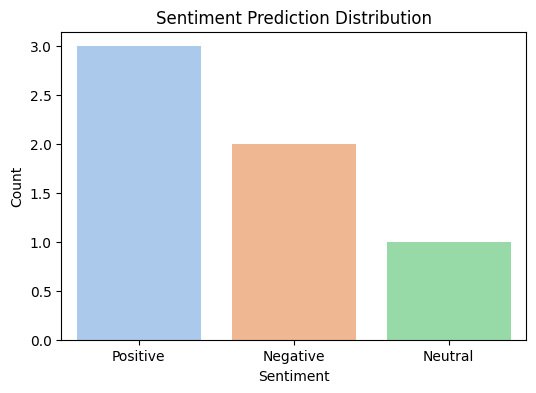

In [53]:
predicted_labels = ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Positive']
df_results = pd.DataFrame(predicted_labels, columns=['Sentiment'])

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df_results, palette='pastel')
plt.title('Sentiment Prediction Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


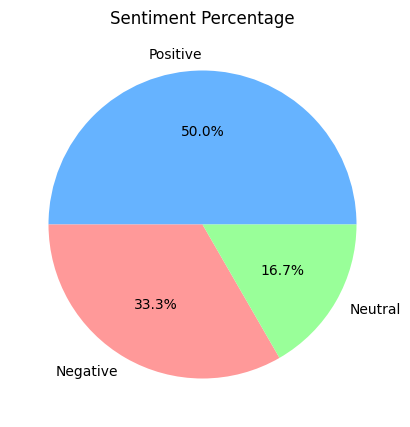

In [54]:
df_results['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5), colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Sentiment Percentage')
plt.ylabel('')
plt.show()


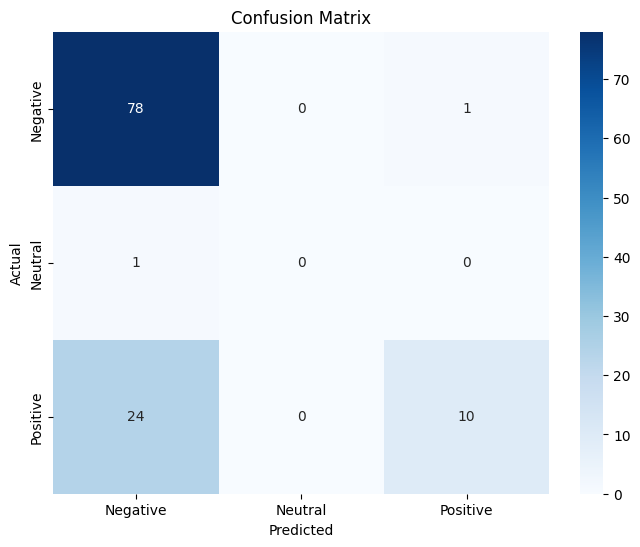

In [64]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()